# Introdução

This project aims to grant credit through logistic regression, which is a statistical technique widely used for this purpose, as it is very useful and easy to handle and understand. The database used is real data, the CPF number and name of the person were removed to maintain secrecy.
There are many columns in the dataset and some of them do not need to be explained as they are just names of credit lines in Brazil, but some important ones used in the modeling are:
- Carteira Ativa: How much was spent on your behalf
- Idade: Age
- CNAE: What activity does the person work
- Custo da Dívida: Average interest percentage of all lines of credit the person has
- Vencidos: Payment delays
- Modalidade: Represents various types of credit
- Imóveis rurais: Rural properties
- target: That's our target - 0 or 1

# Importing Libraries and Extracting the Database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pymongo import MongoClient
from datetime import date, datetime as dt
import re
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [40]:
df = pd.read_excel('Planilhas/Modelos/data_base.xlsx')

# Exploratory Data Analysis and Variable Creation

In [6]:
df.head()

,Idade,atividade CNAE mais antiga,Qtde Protestos,Valor Total Protestos,Embargos ambientais,Criminal,Qtde Processos,Qtde Imóveis Rurais,Soma das áreas dos imóveis rurais,Vencidos 1m,...,Cartao credito 1m,Cartao credito 12m,Cheque especial 1m,Cheque especial 12m,Sem consignacao 1m,Sem consignacao 12m,Com consignacao 1m,Com consignacao 12m,score_quod,target
0,37.0,NaN,0.0,0.0,0.0,1.0,NaN,0,0.0,0.0,...,0.137,0.150,0.000,0.000,0.0,0.0,0.0,0.0,518.0,1
1,31.0,4789-0/99 - Comércio varejista de outros produtos não especificados anteriormente,0.0,0.0,0.0,1.0,2.0,0,0.0,0.0,...,0.000,0.000,0.022,0.155,0.0,0.0,0.0,0.0,935.0,0
2,42.0,0151202 - Criação de bovinos para leite,0.0,0.0,0.0,1.0,12.0,0,0.0,0.0,...,0.491,0.505,0.000,0.000,0.0,0.0,0.0,0.0,548.0,1
3,58.0,NaN,0.0,0.0,0.0,1.0,NaN,0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,694.0,0
4,26.0,0134-2/00 - Cultivo de café,0.0,0.0,0.0,1.0,NaN,0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,926.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19715 entries, 0 to 19714
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Idade                              19678 non-null  float64
 1   atividade CNAE mais antiga         8816 non-null   object 
 2   Qtde Protestos                     17969 non-null  float64
 3   Valor Total Protestos              17968 non-null  float64
 4   Embargos ambientais                18186 non-null  float64
 5   Criminal                           17079 non-null  float64
 6   Qtde Processos                     8761 non-null   float64
 7   Qtde Imóveis Rurais                19715 non-null  int64  
 8   Soma das áreas dos imóveis rurais  19715 non-null  float64
 9   Vencidos 1m                        19711 non-null  float64
 10  Vencidos media 12m                 19711 non-null  float64
 11  Qtde Vencidos 12m                  19711 non-null  flo

## Adjusting CNAE

As can be seen, the CNAE is representing the code along with the name of the activity. The intention is to analyze only the code, so the first step is to separate it from the name and standardize it

In [44]:
df['cod_cnae'] = None
for i in range(len(df)):
    try:
        lista = df['atividade CNAE mais antiga'][i].split(' - ')
    except:
        lista = []
        df['atividade CNAE mais antiga'][i] = '0'
    if len(lista) > 1:
        cod = lista[0]
        cod = re.sub('[.\-/]','',cod)
        df['cod_cnae'][i] = cod

C:\Users\JOAOPE~1\AppData\Local\Temp/ipykernel_54964/1335142682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atividade CNAE mais antiga'][i] = '0'
C:\Users\JOAOPE~1\AppData\Local\Temp/ipykernel_54964/1335142682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cod_cnae'][i] = cod


In [9]:
df['cod_cnae'].value_counts().head(30)

0151201    1090
0151202     910
0111302     358
0134200     274
0115600     267
0114800     123
0121101     119
4781400      82
0119999      61
5099899      57
4712100      55
0111301      41
0119905      38
0155501      36
5611203      35
0121102      34
4744099      33
4530703      31
4930202      31
0151203      29
4723700      28
0133402      28
0119906      24
712100       24
5611201      24
0111399      23
4722901      22
0322101      21
4724500      20
4399103      19
Name: cod_cnae, dtype: int64

It is noticed that there are some CNAEs that are very common and others appear infrequently, these ones will be classified as 'other'. Null values will be padded with '0'.

In [45]:
lista_cnae = list(df['cod_cnae'].value_counts().head(9).index)

In [46]:
df['cod_cnae'].fillna('0', inplace=True)

In [47]:
lista_cnae.append('0')

In [48]:
for i in range(len(df)):
    cod = df['cod_cnae'][i]
    cod = 'other' if cod not in lista_cnae else cod
    df['cod_cnae'][i] = cod

C:\Users\JOAOPE~1\AppData\Local\Temp/ipykernel_54964/4168600722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cod_cnae'][i] = cod


In [49]:
df.drop(columns=['atividade CNAE mais antiga'], inplace=True)

In [50]:
df['cod_cnae'].value_counts()

0          14497
other       1934
0151201     1090
0151202      910
0111302      358
0134200      274
0115600      267
0114800      123
0121101      119
4781400       82
0119999       61
Name: cod_cnae, dtype: int64

## Creating Variables for Specific Lines of Credit

In [51]:
df['consig_class'] = np.nan
df['cheque_class'] = np.nan
df['cartao_class'] = np.nan
df['cred_class'] = np.nan
df['adiant_class'] = np.nan
df['invest_carteira'] = np.nan
df['custeio_carteira'] = np.nan
for i in range(len(df)):
    df['consig_class'][i] = (df['Sem consignacao 1m'][i] + df['Com consignacao 1m'][i])/(df['Sem consignacao 12m'][i] + df['Com consignacao 12m'][i]) if (df['Sem consignacao 12m'][i] + df['Com consignacao 12m'][i]) > 0 else (df['Sem consignacao 1m'][i] + df['Com consignacao 1m'][i])/0.1
    df['cheque_class'][i] = df['Cheque especial 1m'][i]/df['Cheque especial 12m'][i] if df['Cheque especial 12m'][i] > 0 else df['Cheque especial 1m'][i]/0.1
    df['cartao_class'][i] = df['Cartao credito 1m'][i]/df['Cartao credito 12m'][i] if df['Cartao credito 12m'][i] > 0 else df['Cartao credito 1m'][i]/0.1
    df['cred_class'][i]   = df['Cred rotativo 1m'][i]/df['Cred rotativo 12m'][i] if df['Cred rotativo 12m'][i] > 0 else df['Cred rotativo 1m'][i]/0.1
    df['adiant_class'][i] = df['Adiantamento 1m'][i]/df['Adiantamento 12m'][i] if df['Adiantamento 12m'][i] > 0 else df['Adiantamento 1m'][i]/0.1
    df['invest_carteira'][i] = df['investimento1'][i]/df['Carteira Ativa 1m'][i] if df['Carteira Ativa 1m'][i] > 0 else df['investimento1'][i]/0.1
    df['custeio_carteira'][i] = df['custeio1'][i]/df['Carteira Ativa 1m'][i] if df['Carteira Ativa 1m'][i] > 0 else df['custeio1'][i]/0.1

C:\Users\JOAOPE~1\AppData\Local\Temp/ipykernel_54964/1138556057.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['consig_class'][i] = (df['Sem consignacao 1m'][i] + df['Com consignacao 1m'][i])/(df['Sem consignacao 12m'][i] + df['Com consignacao 12m'][i]) if (df['Sem consignacao 12m'][i] + df['Com consignacao 12m'][i]) > 0 else (df['Sem consignacao 1m'][i] + df['Com consignacao 1m'][i])/0.1
C:\Users\JOAOPE~1\AppData\Local\Temp/ipykernel_54964/1138556057.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cheque_class'][i] = df['Cheque especial 1m'][i]/df['Cheque especial 12m'][i] if df['Cheque especial 12m']

In [53]:
df.loc[df['consig_class'] < 1, 'consig_class'] = 0
df.loc[df['consig_class'] >= 1, 'consig_class'] = 1

df.loc[df['cheque_class'] < 1, 'cheque_class'] = 0
df.loc[df['cheque_class'] >= 1, 'cheque_class'] = 1

df.loc[df['cartao_class'] < 1, 'cartao_class'] = 0
df.loc[df['cartao_class'] >= 1, 'cartao_class'] = 1

df.loc[df['cred_class'] < 1, 'cred_class'] = 0
df.loc[df['cred_class'] >= 1, 'cred_class'] = 1

df.loc[df['adiant_class'] < 1, 'adiant_class'] = 0
df.loc[df['adiant_class'] >= 1, 'adiant_class'] = 1

## Missing Data

As our base is practically made up of variables of lines of credit or ownership of rural properties, so when it is null it is because the person did not take that type of credit or does not have a property registered in their name. In this way, we can fill in the missing data with zero

In [60]:
df = df.fillna(0)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19715 entries, 0 to 19714
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Idade                              19715 non-null  float64
 1   Qtde Protestos                     19715 non-null  float64
 2   Valor Total Protestos              19715 non-null  float64
 3   Embargos ambientais                19715 non-null  float64
 4   Criminal                           19715 non-null  float64
 5   Qtde Processos                     19715 non-null  float64
 6   Qtde Imóveis Rurais                19715 non-null  int64  
 7   Soma das áreas dos imóveis rurais  19715 non-null  float64
 8   Vencidos 1m                        19715 non-null  float64
 9   Vencidos media 12m                 19715 non-null  float64
 10  Qtde Vencidos 12m                  19715 non-null  float64
 11  Prejuízos 1m                       19715 non-null  flo

# Base Division

In [82]:
X = df.drop(['target'], axis=1)
y = df['target']

print(X.shape, y.shape)

(19715, 46) (19715,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13800, 46) (13800,)
(5915, 46) (5915,)


# Exploratory Analysis

## Treating Outliers

The treatment of outliers will be done through the Profile Report (a document generated with various statistical information for each variable), with a margin of 5 - 95%, the values that will not be in this range will be reassessed.

In [22]:
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train,minimal=True)

Pandas backend loaded 1.3.4
Numpy backend loaded 1.20.3
Pyspark backend NOT loaded
Python backend loaded


In [23]:
profile.to_file('profile_regressao.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\joaopedro\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
X_train.loc[X_train['Soma das áreas dos imóveis rurais'] > 52.805, 'Soma das áreas dos imóveis rurais'] = 52.805
X_train.loc[X_train['Carteira Ativa 1m'] > 499, 'Carteira Ativa 1m'] = 499
X_train.loc[X_train['Carteira Ativa media 12m'] > 422.58747, 'Carteira Ativa media 12m'] = 422.58747
X_train.loc[X_train['Modalidade Emprestimos'] > 145.05, 'Modalidade Emprestimos'] = 145.05
X_train.loc[X_train['Modalidade Outros Créditos'] > 22, 'Modalidade Outros Créditos'] = 22
X_train.loc[X_train['tempo experiencia max'] > 19, 'tempo experiencia max'] = 19
X_train.loc[X_train['Custo da Divida 1m'] > 0.07302552465, 'Custo da Divida 1m'] = 0.07302552465
X_train.loc[X_train['Custo da Divida 6m'] > 0.3331455, 'Custo da Divida 6m'] = 0.3331455
X_train.loc[X_train['Custo da Divida 12m'] > 2.7000878, 'Custo da Divida 12m'] = 2.7000878

C:\Users\joaopedro\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Applying Information Value (IV)

The IV is calculated to identify how important that variable is for our target, where <0.1 is not very significant, between 0.1 and 0.5 are significant and >0.5 is too significant or too good to be true, that is, it may be that it causes an imbalance in the model.

In [25]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

In [85]:
cols_df = list(X_train.columns)

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13800 entries, 18476 to 14155
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Idade                              13800 non-null  float64
 1   Qtde Protestos                     13800 non-null  float64
 2   Valor Total Protestos              13800 non-null  float64
 3   Embargos ambientais                13800 non-null  float64
 4   Criminal                           13800 non-null  float64
 5   Qtde Processos                     13800 non-null  float64
 6   Qtde Imóveis Rurais                13800 non-null  int64  
 7   Soma das áreas dos imóveis rurais  13800 non-null  float64
 8   Vencidos 1m                        13800 non-null  float64
 9   Vencidos media 12m                 13800 non-null  float64
 10  Qtde Vencidos 12m                  13800 non-null  float64
 11  Prejuízos 1m                       13800 non-null 

In [87]:
categorical_variables = ['adiant_class','cred_class','cartao_class','cheque_class','consig_class','cod_cnae']
binning_process = BinningProcess(cols_df,categorical_variables=categorical_variables,min_prebin_size = 0.1,max_n_bins=3)
binning_process.fit(X_train, y_train)

BinningProcess(categorical_variables=['adiant_class', 'cred_class',
                                      'cartao_class', 'cheque_class',
                                      'consig_class', 'cod_cnae'],
               max_n_bins=3, min_prebin_size=0.1,
               variable_names=['Idade', 'Qtde Protestos',
                               'Valor Total Protestos', 'Embargos ambientais',
                               'Criminal', 'Qtde Processos',
                               'Qtde Imóveis Rurais',
                               'Soma das áreas dos imóveis rurais',
                               'Vencidos 1m', 'Vencidos media 12m',
                               '...
                               'Prejuízos media 12m', 'Qtde Prejuízos 12m',
                               'Carteira Ativa 1m', 'Carteira Ativa media 12m',
                               'Qtde Carteira Ativa 12m',
                               'Modalidade Emprestimos',
                               'Modalidade Outros 

In [88]:
iv_1 = binning_process.summary().sort_values(by=['iv'], ascending=False)

In [89]:
import mitosheet
mitosheet.sheet(iv_1, analysis_to_replay="id-kxlusiakau")

MitoWidget(analysis_data_json='{"analysisName": "id-icrtsoyovi", "analysisToReplay": {"analysisName": "id-kxlu…

We will evaluate each variable that had an IV > 0.5 through its event rate. If the event rate continuously grows or decreases between bins, it's a good sign.

In [90]:
optb = binning_process.get_binned_variable("Carteira Ativa 1m")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.62)",2503,0.181377,421,2082,0.831802,-2.112989,0.749076,0.079364
1,"[0.62, 14.50)",4269,0.309348,2885,1384,0.324198,0.22001,0.014513,0.001811
2,"[14.50, inf)",7028,0.509275,5331,1697,0.241463,0.630139,0.181823,0.022359
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,13800,1.000000,8637,5163,0.374130,,0.945412,0.103534


In [91]:
optb = binning_process.get_binned_variable("Carteira Ativa media 12m")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.32)",2196,0.159130,349,1847,0.841075,-2.180784,0.692028,0.072622
1,"[0.32, 1.75)",1510,0.109420,839,671,0.444371,-0.291096,0.009555,0.001190
2,"[1.75, inf)",10094,0.731449,7449,2645,0.262037,0.520871,0.182385,0.022544
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,13800,1.000000,8637,5163,0.374130,,0.883968,0.096356


In [92]:
optb = binning_process.get_binned_variable("Qtde Carteira Ativa 12m")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",1769,0.128188,258,1511,0.854155,-2.282105,0.599709,0.062022
1,"[2.50, 11.50)",1982,0.143623,1008,974,0.491423,-0.480225,0.034549,0.004278
2,"[11.50, inf)",10049,0.728188,7371,2678,0.266494,0.497946,0.166678,0.020622
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,13800,1.000000,8637,5163,0.374130,,0.800936,0.086922


In [93]:
optb = binning_process.get_binned_variable("Custo da Divida 1m")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.00)",3026,0.219275,1070,1956,0.646398,-1.11778,0.284994,0.033878
1,"[0.00, 0.03)",8068,0.584638,6245,1823,0.225954,0.71676,0.265175,0.032455
2,"[0.03, inf)",2706,0.196087,1322,1384,0.511456,-0.56037,0.064442,0.007951
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,13800,1.000000,8637,5163,0.374130,,0.614610,0.074285


In [94]:
optb = binning_process.get_binned_variable("score_quod")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 677.50)",3416,0.247536,1273,2143,0.627342,-1.035368,0.277147,0.033174
1,"[677.50, 871.50)",6401,0.463841,4026,2375,0.371036,0.013238,0.000081,0.000010
2,"[871.50, inf)",3983,0.288623,3338,645,0.161938,1.129339,0.295378,0.035077
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,13800,1.000000,8637,5163,0.374130,,0.572606,0.068262


Only the "Custo da Divida 1m" that did not have a continuous increase/decrease in relation to the bins, so we will exclude it from the base. The rest seemed to be very relevant to the model.

In [95]:
iv_filtered = iv_1[iv_1['iv'] > 0.1]
iv_filtered

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
14,Carteira Ativa 1m,numerical,OPTIMAL,True,3,0.945412,0.103534,0.410175,0.173678
15,Carteira Ativa media 12m,numerical,OPTIMAL,True,3,0.883968,0.096356,0.379652,0.162464
16,Qtde Carteira Ativa 12m,numerical,OPTIMAL,True,3,0.800936,0.086922,0.363251,0.232778
20,Custo da Divida 1m,numerical,OPTIMAL,True,3,0.61461,0.074285,0.394741,0.547806
37,score_quod,numerical,OPTIMAL,True,3,0.572606,0.068262,0.387228,0.670271
...,...,...,...,...,...,...,...,...,...
44,invest_carteira,numerical,OPTIMAL,True,3,0.182514,0.022093,0.162129,0.298004
24,investimento1,numerical,OPTIMAL,True,3,0.180147,0.021853,0.161332,0.282865
21,Custo da Divida 6m,numerical,OPTIMAL,True,3,0.16473,0.020181,0.19264,0.399804
18,Modalidade Outros Créditos,numerical,OPTIMAL,True,3,0.154317,0.019119,0.199098,0.422271


In [96]:
X_train_c = X_train[list(iv_filtered['name'])]

In [97]:
X_train_c.drop(columns=['Custo da Divida 1m'], inplace=True)

C:\Users\joaopedro\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Analisando a Correlação

Variables that are highly correlated (either positively or negatively), will be excluded the one with the lowest IV value to avoid the multicollinearity. Variables that have more than 80% correlation will be treated

<AxesSubplot:>

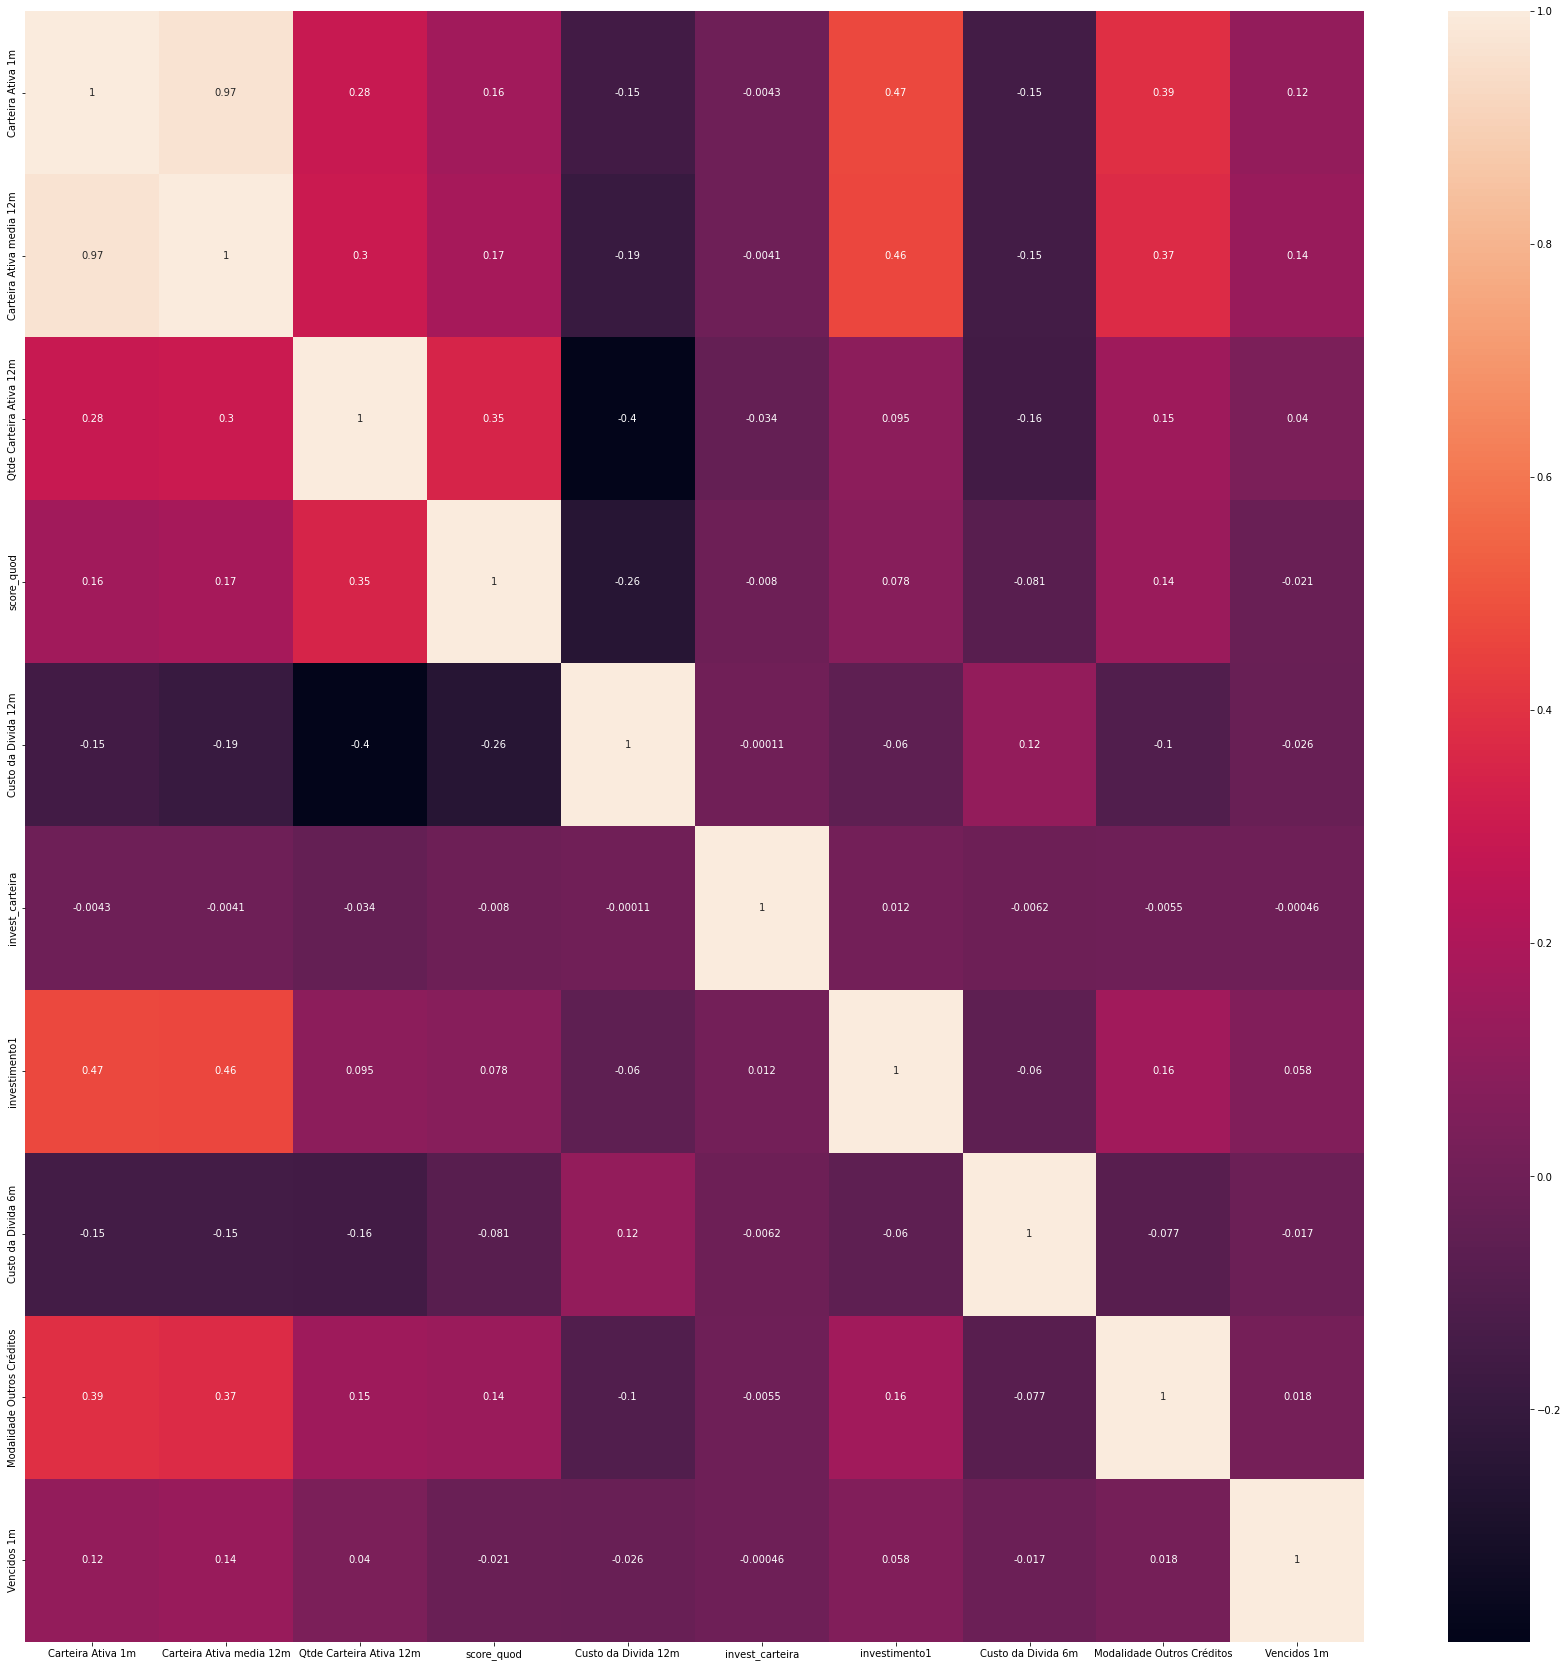

In [98]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train_c.corr(), annot = True)

In this case, only the 'Carteira Ativa media 12m' will be excluded

In [99]:
X_train_c.drop(columns=['Carteira Ativa media 12m'], inplace=True)

# Modeling

## Using StatsModel

In [100]:
X_test_c = X_test[list(X_train_c.columns)]

In [101]:
# Initialize the instance and train the model

x_train_ = sm.add_constant(X_train_c)
x_test_ = sm.add_constant(X_test_c)

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())

reg_log = reg_log.fit()

print(reg_log.summary())

C:\Users\joaopedro\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\joaopedro\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\joaopedro\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\joaopedro\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                13800
Model:                            GLM   Df Residuals:                    13790
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Oct 2022   Deviance:                       14889.
Time:                        17:25:27   Pearson chi2:                 2.47e+08
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

The only variable that proved to be of little relevance, according to the p-value, is the 'Carteira Ativa 1m', but we will keep it in the model because it is relevant in the evaluation of the client's SCR

In [102]:
# Predicting on the training and test base

y_pred_train = reg_log.predict(x_train_)

y_pred_test = reg_log.predict(x_test_)

# Calculating ROC and Gini - Training
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Training : %f" % roc_auc_train)
print("Gini - Training: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculating ROC and Gini - Test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Test : %f" % roc_auc_test)
print("Gini - Test: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.783394
Gini - Treinamento:  0.57


AUC - Teste : 0.777149
Gini - Teste:  0.55


C:\Users\joaopedro\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Both the AUC and Gini values are favorable, it still wouldn't be a great model, but we can say that it's good! Furthermore, the model appeared to be stable as there was little difference in indicators between training and testing.

Now let's define the best cutoff point for credit acceptance. Here we will use the threshold value, where it indicates a higher TPR (True Positive Rate) and a lower FPR (False Positive Rate)

In [103]:
i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({'fpr' : pd.Series(fpr_train, index=i)
                    , 'tpr' : pd.Series(tpr_train, index = i)
                    , '1-fpr' : pd.Series(1-fpr_train, index = i)
                    , 'tf' : pd.Series(tpr_train - (1-fpr_train), index = i)
                    , 'thresholds' : pd.Series(thresholds_train, index = i)})

print(round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3))

        fpr    tpr  1-fpr   tf  thresholds
2613  0.291  0.709  0.709 -0.0       0.315


Optimal cut point: 0.353 


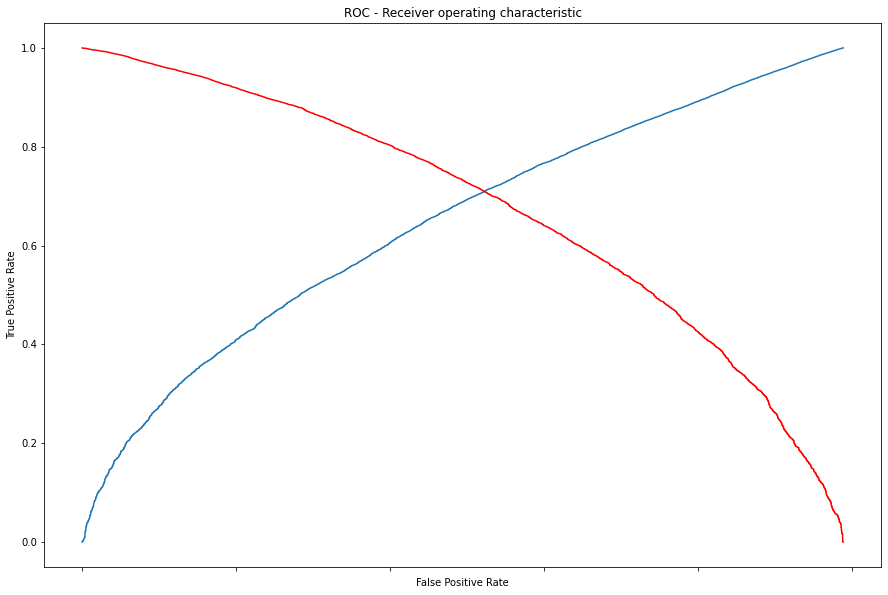

In [104]:
# Plotting ROC (AUC) - Training
fig, ax = plt.subplots()
plt.plot(roc_train['tpr'])
plt.plot(roc_train['1-fpr'], color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
ax.set_xticklabels([]);
plt.gcf().set_size_inches(15, 10)

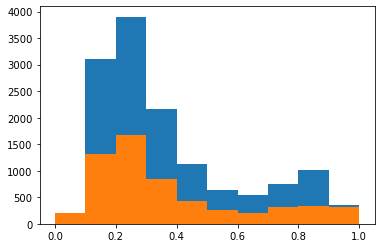

In [105]:
# Adjusting the cut point

cutoff = 0.315

# However, be careful: note that the final scores are not that granular (small base/few variables)
# And there is concentration in 1

plt.hist(y_pred_train)
plt.hist(y_pred_test);

# The effect here will be limited by the example, but on larger bases the impact is huge

In [106]:
# Preprocessing for the confusion matrix - Data must be binary
from sklearn.metrics import confusion_matrix

y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

# Stepping through and transforming all training probabilities
for score in range(0, len(y_pred_train-1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0
        

# Stepping through and transforming all test probabilities
for score in range(0, len(y_pred_test-1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [107]:
# Evaluating the training base
print(confusion_matrix(y_train, y_pred_train_bin))
print("\n")
# Evaluating the test base
print(confusion_matrix(y_valid, y_pred_test_bin))

Evaluating the training base:
[[7276 1361]
 [2335 2828]]


Evaluating the test base:
[[3150  589]
 [ 985 1191]]


# Conclusion

Both the AUC and Gini values are favorable, it still wouldn't be a great model, but we can say that it's good! Furthermore, the model appeared to be stable as there was little difference in indicators between training and testing.